# 03 Plot global map of mean wind and its standard deviation in Python


In [1]:
from IPython.display import Image

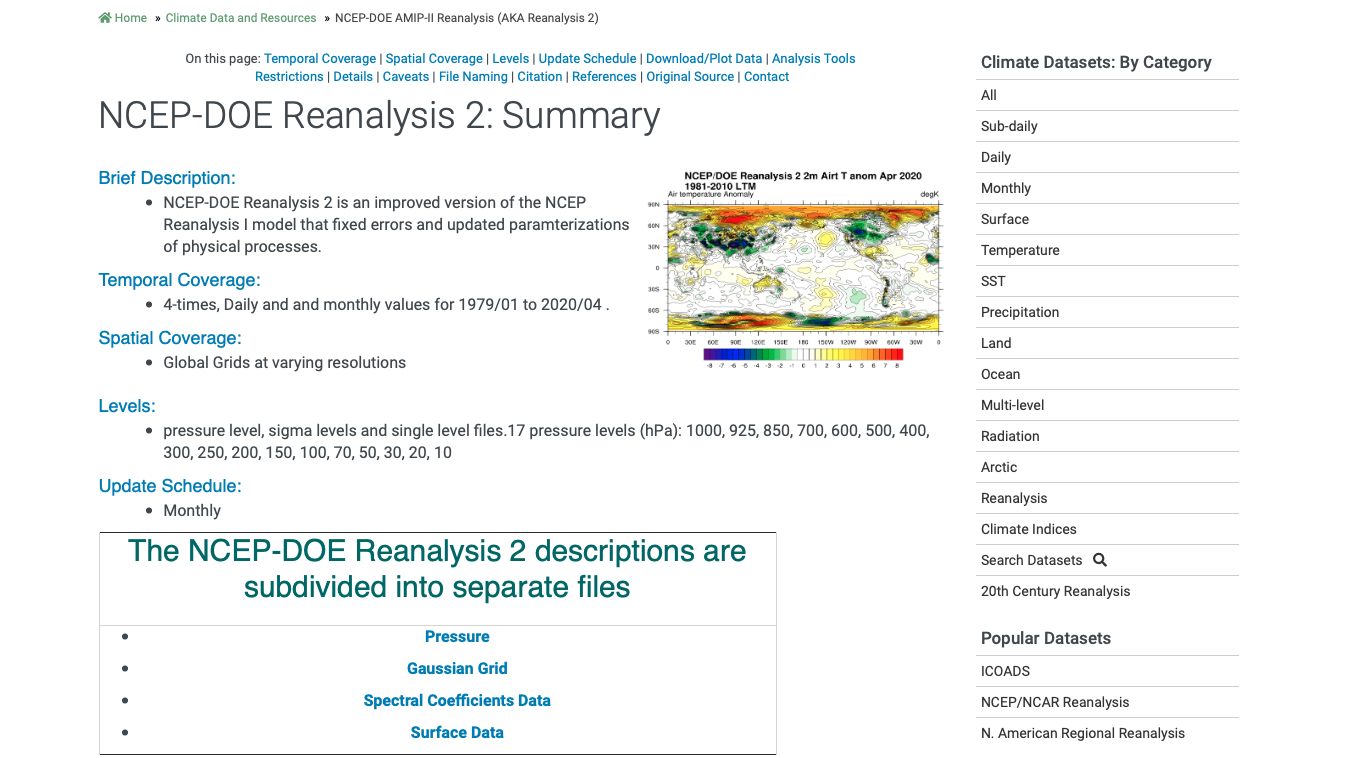

In [2]:
Image('03_ncep_fig.png')
#here is the link: https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis2.html

## 1. Import libraries

In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## 2. Read the input file

In [4]:
path_in = '../00_data/TA_data/'
df = xr.open_dataset(path_in + 'uwnd.mon.mean.nc')
print(df)

<xarray.Dataset>
Dimensions:    (lat: 73, level: 17, lon: 144, nbnds: 2, time: 494)
Coordinates:
  * level      (level) float32 1000.0 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-02-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] ...
    uwnd       (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    history:        created 2002/03 by Hoop (netCDF2.3)
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    Re

/Users/sonnytruong/soft_install/anaconda3/envs/PhD/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'uwnd' has multiple fill values {-32767, 32766}, decoding all values to NaN.
  use_cftime=use_cftime,


## 3. Take out the variables

In [5]:
lon_ = df.lon 
lat_ = df.lat
lev_ = df.level   
time_  = df.time
uwin_  = df.uwnd
print(uwin_.shape)

(494, 17, 73, 144)


In [6]:
print(time_)

<xarray.DataArray 'time' (time: 494)>
array(['1979-01-01T00:00:00.000000000', '1979-02-01T00:00:00.000000000',
       '1979-03-01T00:00:00.000000000', ..., '2019-12-01T00:00:00.000000000',
       '2020-01-01T00:00:00.000000000', '2020-02-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-02-01
Attributes:
    long_name:           Time
    actual_range:        [1569072. 1929216.]
    delta_t:             0000-01-00 00:00:00
    avg_period:          0000-01-00 00:00:00
    prev_avg_period:     0000-00-01 00:00:00
    standard_name:       time
    axis:                T
    coordinate_defines:  start
    bounds:              time_bnds


In [7]:
print(time_[0].values)

1979-01-01T00:00:00.000000000


In [8]:
print(time_[-1].values)

2020-02-01T00:00:00.000000000


In [9]:
print(lev_)

<xarray.DataArray 'level' (level: 17)>
array([1000.,  925.,  850.,  700.,  600.,  500.,  400.,  300.,  250.,  200.,
        150.,  100.,   70.,   50.,   30.,   20.,   10.], dtype=float32)
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
Attributes:
    units:               millibar
    actual_range:        [1000.   10.]
    long_name:           Level
    positive:            down
    GRIB_id:             100
    GRIB_name:           hPa
    axis:                Z
    coordinate_defines:  point


In [10]:
print(lon_)

<xarray.DataArray 'lon' (lon: 144)>
array([  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,  20. ,  22.5,
        25. ,  27.5,  30. ,  32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,
        50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,  72.5,
        75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
       100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5, 120. , 122.5,
       125. , 127.5, 130. , 132.5, 135. , 137.5, 140. , 142.5, 145. , 147.5,
       150. , 152.5, 155. , 157.5, 160. , 162.5, 165. , 167.5, 170. , 172.5,
       175. , 177.5, 180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
       200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. , 222.5,
       225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5, 245. , 247.5,
       250. , 252.5, 255. , 257.5, 260. , 262.5, 265. , 267.5, 270. , 272.5,
       275. , 277.5, 280. , 282.5, 285. , 287.5, 290. , 292.5, 295. , 297.5,
       300. , 302.5, 305. , 307.5, 310. 

In [11]:
print(lat_)

<xarray.DataArray 'lat' (lat: 73)>
array([ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,  67.5,
        65. ,  62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,  45. ,  42.5,
        40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,  22.5,  20. ,  17.5,
        15. ,  12.5,  10. ,   7.5,   5. ,   2.5,   0. ,  -2.5,  -5. ,  -7.5,
       -10. , -12.5, -15. , -17.5, -20. , -22.5, -25. , -27.5, -30. , -32.5,
       -35. , -37.5, -40. , -42.5, -45. , -47.5, -50. , -52.5, -55. , -57.5,
       -60. , -62.5, -65. , -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5,
       -85. , -87.5, -90. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
Attributes:
    units:               degrees_north
    actual_range:        [ 90. -90.]
    long_name:           Latitude
    standard_name:       latitude
    axis:                Y
    coordinate_defines:  point


(494, 17, 73, 144)


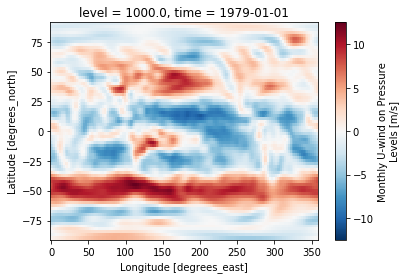

In [12]:
# plot an example at time=0, lev=0, global domain
print(uwin_.shape)
uwin_[0,0,:,:].plot()

In [13]:
print(uwin_.shape)
uwin_10yrs = uwin_.loc['2001-01':'2010-12']
print('uwin_10yrs:', uwin_10yrs.shape)
print('uwin_10yrs first time', uwin_10yrs.time[0].values)
print('uwin_10yrs last time', uwin_10yrs.time[-1].values)

(494, 17, 73, 144)
uwin_10yrs: (120, 17, 73, 144)
uwin_10yrs first time 2001-01-01T00:00:00.000000000
uwin_10yrs last time 2010-12-01T00:00:00.000000000


## 4. Calculate the wind average and its standard deviation

In [14]:
#AVERAGE
print('uwind average shape before', uwin_.shape)
# u_10y = np.mean(u, axis=0) # calculate mean for all years and months

uwin_mean = uwin_.mean(axis=0)
print('uwind average shape after', uwin_mean.shape)

#Standard deviation
print('uwind standard deviation shape before', uwin_.shape)

uwin_std = uwin_.std(axis=0)
print('uwind standard deviation shape after', uwin_std.shape)

uwind average shape before (494, 17, 73, 144)
uwind average shape after (17, 73, 144)
uwind standard deviation shape before (494, 17, 73, 144)
uwind standard deviation shape after (17, 73, 144)


## 5. Plotting

/Users/sonnytruong/soft_install/anaconda3/envs/PhD/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
/Users/sonnytruong/soft_install/anaconda3/envs/PhD/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'Averaged zonal wind at 1000 hPa (2000-2010)')

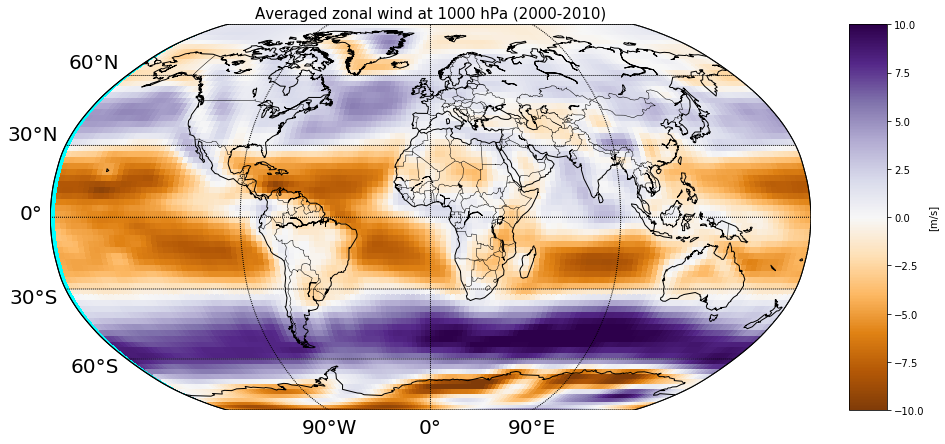

In [43]:
#Average wind at 1000 hPa
[lons, lats] = np.meshgrid(lon_,lat_)

fig = plt.figure(figsize=(15,15))
m   = Basemap(projection='robin', lon_0=0)
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0], fontsize=20)
m.drawmeridians(np.arange(0.,360.,90.)  ,labels=[0,0,0,1], fontsize=20)
m.drawmapboundary(fill_color='aqua')
m.drawcoastlines(color='black')
m.drawcountries(color='black')
min_ = -10
max_ = 10

c = m.pcolormesh(lons, lats, uwin_mean[0,:,:], shading='flat', latlon=True, cmap='PuOr', vmin=min_, vmax=max_)
m.colorbar(c, location='right', pad="5%", label='[m/s]')

plt.title('Averaged zonal wind at 1000 hPa (2000-2010)', fontsize=15)

/Users/sonnytruong/soft_install/anaconda3/envs/PhD/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys
/Users/sonnytruong/soft_install/anaconda3/envs/PhD/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]


Text(0.5, 1.0, 'The standard deviation of the zonal wind at 1000 hPa (2000-2010)')

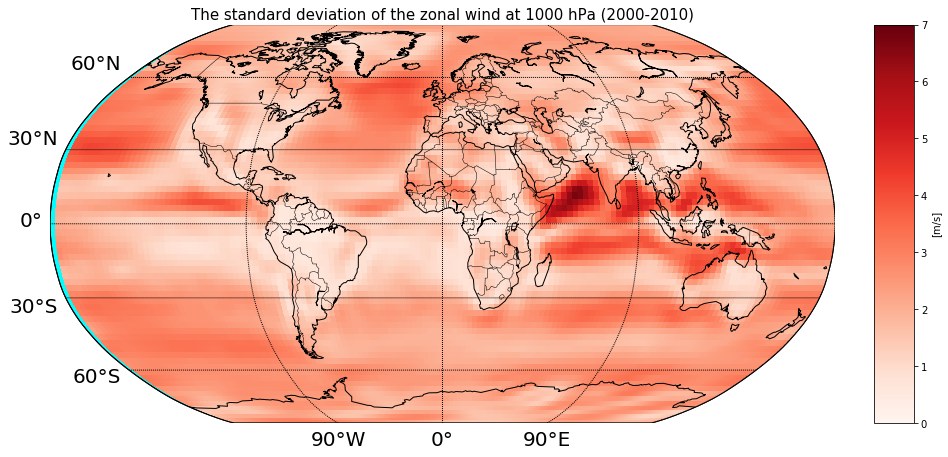

In [44]:
#standard deviation at 1000 hPa
[lons, lats] = np.meshgrid(lon_,lat_)

fig = plt.figure(figsize=(15,15))
ax = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(projection='robin', lon_0=0)

m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0],fontsize=20)
m.drawmeridians(np.arange(0.,360.,90.),labels=[0,0,0,1],fontsize=20)
m.drawmapboundary(fill_color='aqua')
m.drawcoastlines(color='black')
m.drawcountries(color='black')
min_ = np.round((np.min(uwin_std[0])))
max_ = np.round((np.max(uwin_std[0])))

h = m.pcolormesh(lons, lats, uwin_std[0,:,:], shading='flat',latlon=True, cmap='Reds', vmin=min_, vmax=max_)
m.colorbar(h, location='right', pad="5%", label='[m/s]')

plt.title('The standard deviation of the zonal wind at 1000 hPa (2000-2010)',fontsize=15)

/Users/sonnytruong/soft_install/anaconda3/envs/PhD/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
/Users/sonnytruong/soft_install/anaconda3/envs/PhD/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


Text(0.5, 1.0, 'Averaged zonal wind at 500 hPa (2000-2010)')

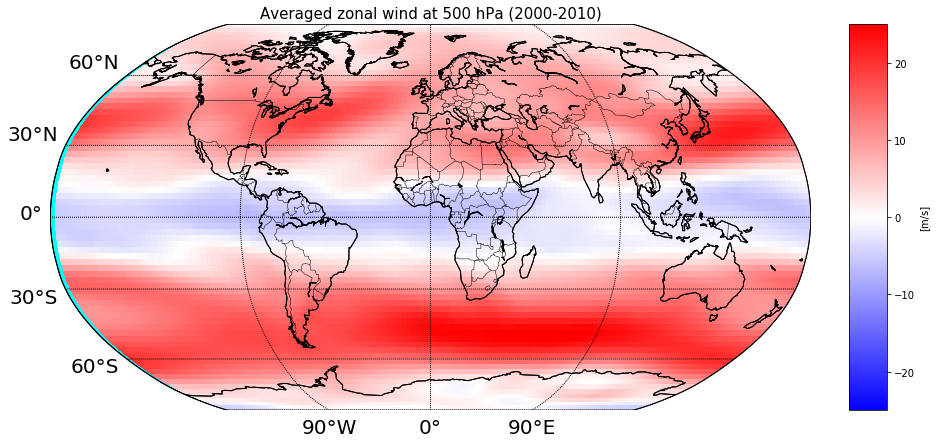

In [45]:
#Average wind at 500 hPa
[lons, lats] = np.meshgrid(lon_,lat_)

fig = plt.figure(figsize=(15,15))
m   = Basemap(projection='robin', lon_0=0)

m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0], fontsize=20)
m.drawmeridians(np.arange(0.,360.,90.)  ,labels=[0,0,0,1], fontsize=20)
m.drawmapboundary(fill_color='aqua')
m.drawcoastlines(color='black')
m.drawcountries(color='black')
min_ = -25
max_ = 25

c = m.pcolormesh(lons, lats, uwin_mean[5,:,:], shading='flat',latlon=True, cmap='bwr', vmin=min_, vmax=max_)
m.colorbar(c, location='right', pad="5%", label='[m/s]')

plt.title('Averaged zonal wind at 500 hPa (2000-2010)', fontsize=15)

# All done !!!

- Please feel free to let me know if there is any analysis that you would like me to do or instruct
- Please subscribe my youtube too
- Thank you very much